# MAT281 - Laboratorio N°06



## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [3]:
df['species']=df['species'].str.lower().str.strip().fillna('default')
df.species.value_counts()



setosa        50
virginica     50
versicolor    49
default        1
Name: species, dtype: int64

2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

<AxesSubplot:>

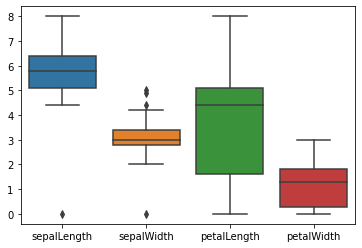

In [4]:
sns.boxplot(data=df.drop(['species'], axis=1).fillna(0))

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [5]:
df=df.assign(label='')
for i in range(df.shape[0]):
    if 7.0 <df.iloc[i]['sepalLength'] or df.iloc[i]['sepalLength']< 4.0:
        df.at[i,'label']='sepalLength'
    if 4.5 <df.iloc[i]['sepalWidth'] or df.iloc[i]['sepalWidth']< 2.0:
        df.at[i,'label']='sepalWidth'
    if 7.0 <df.iloc[i]['petalLength'] or df.iloc[i]['petalLength']< 1.0:
        df.at[i,'label']='petalLength'
    if 2.5 <df.iloc[i]['petalWidth'] or df.iloc[i]['petalWidth']<0.1:
        df.at[i,'label']='petalWidth'
df

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,petalWidth
1,7.2,3.6,6.1,2.5,virginica,sepalLength
2,6.3,3.3,6.0,2.5,virginica,
3,6.7,3.3,5.7,2.5,virginica,
4,6.3,3.4,5.6,2.4,virginica,
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa,
146,4.8,3.0,1.4,0.1,setosa,
147,4.9,3.1,1.5,0.1,setosa,
148,4.9,3.6,1.4,0.1,setosa,


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

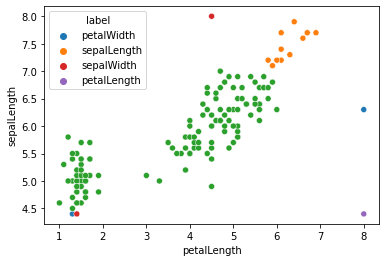

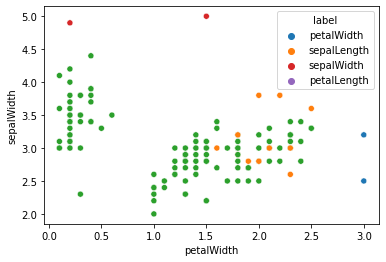

In [6]:
sns.scatterplot(
    data = df, 
    y = 'sepalLength',  
    x = 'petalLength', 
    hue = 'label' 
)
plt.show()

sns.scatterplot(
    data = df, 
    y = 'sepalWidth', 
    x = 'petalWidth', 
    hue = 'label' 
)
plt.show()

se puede concluir que es facil seperar/diferenciar las especies por los criterios dados

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

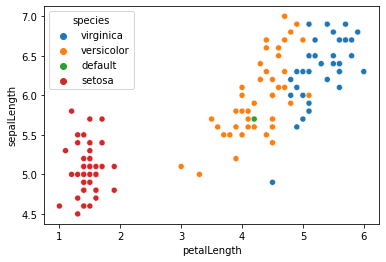

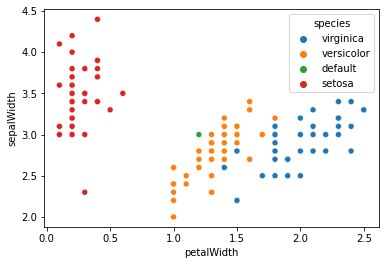

In [7]:
list=['sepalLength','sepalWidth','petalLength','petalWidth']
df = df[df.label.isin(list) == False]
sns.scatterplot(
    data = df, 
    y = 'sepalLength',  
    x = 'petalLength', 
    hue = 'species' 
)
plt.show()

sns.scatterplot(
    data = df, 
    y = 'sepalWidth', 
    x = 'petalWidth', 
    hue = 'species' 
)
plt.show()